In [1]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [2]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator

# Support Vector Classifier

## Non-separable case

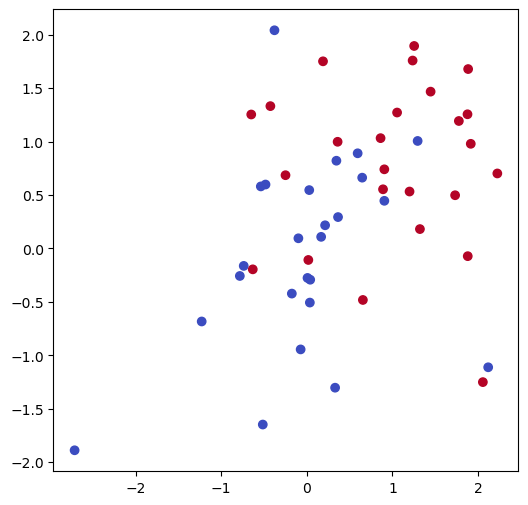

In [11]:
# Generate the training data
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(6,6))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

Coefficients are  [[1.17303943 0.77348227]]


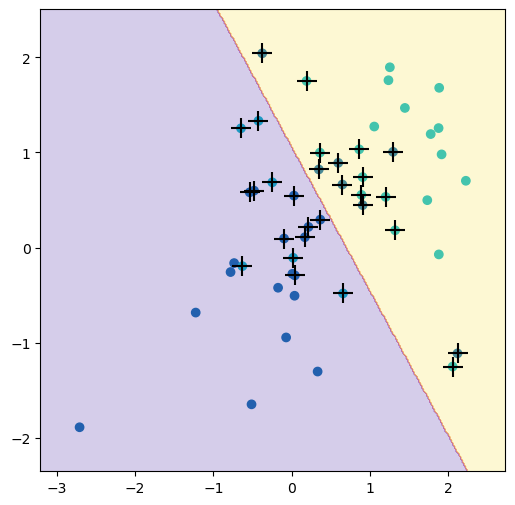

In [19]:
svm_linear = SVC(C=10, kernel='linear') # C=0.1 gives larger number of support vector since the margin is now wider
svm_linear.fit(X, y)
fig, ax = subplots(figsize=(6,6))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)
print("Coefficients are ", svm_linear.coef_)

In [22]:
# Cross-validation to find out the best value of C
kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
print("grid best params are ", grid.best_params_)
print("mean test scores are ", grid.cv_results_[('mean_test_score')])

grid best params are  {'C': 1}
mean test scores are  [0.46 0.46 0.72 0.74 0.74 0.74 0.74]


In [24]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test==1] += 1

In [28]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


##  Separable case

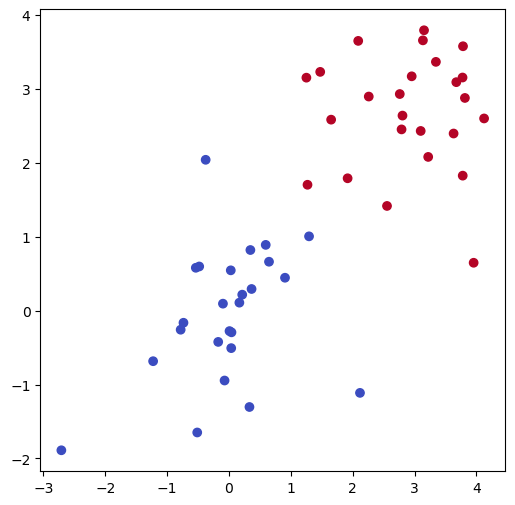

In [30]:
X[y==1] += 1.9
fig, ax = subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

Confusion table is
  Truth      -1   1
Predicted        
-1         25   0
 1          0  25


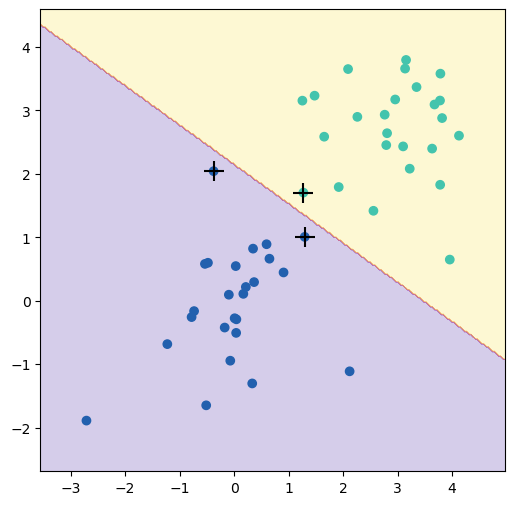

In [38]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y) # large C means small regulrization and large variance, which agrees with smaller supporting vector
y_hat = svm_.predict(X)
print("Confusion table is\n ", confusion_table(y_hat, y))
fig, ax = subplots(figsize=(6,6))
plot_svm(X,
         y,
         svm_,
         ax=ax)

# Support Vector Mechine

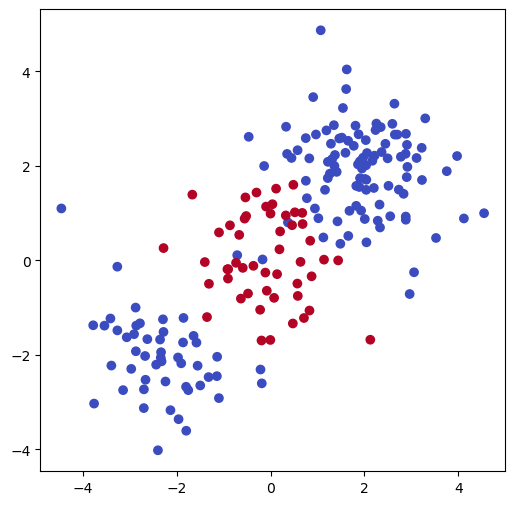

In [45]:
rng = np.random.default_rng(1)
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

fig, ax = subplots(figsize=(6,6))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

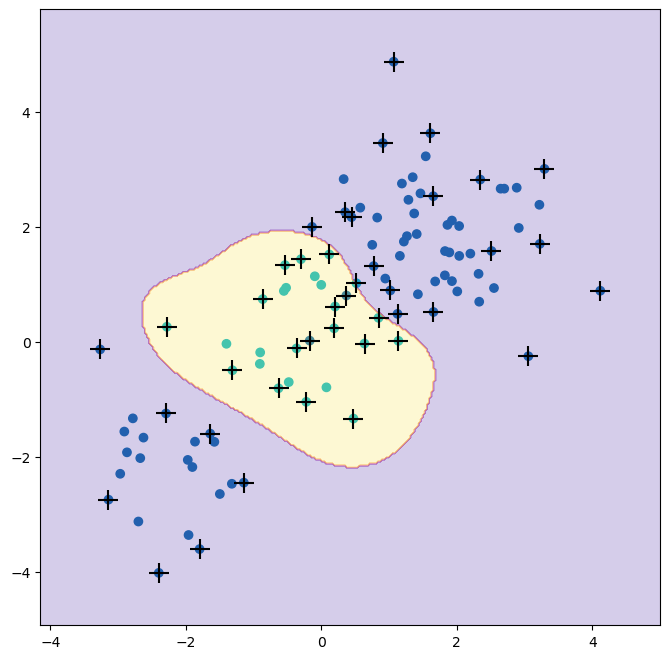

In [52]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, train_size=0.5, random_state=0)
svm_rbf = SVC(kernel='rbf', gamma=1, C=1.0) 
svm_rbf.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [56]:
# Cross-validation to find out the best value of C
kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.001,0.01,0.1,1,5,10,100],
                        'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
print("grid best params are ", grid.best_params_)
print("mean test scores are ", grid.cv_results_[('mean_test_score')])

grid best params are  {'C': 1, 'gamma': 1}
mean test scores are  [0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.74 0.75 0.75 0.75
 0.75 0.94 0.95 0.93 0.92 0.88 0.94 0.92 0.91 0.89 0.87 0.95 0.94 0.93
 0.89 0.88 0.94 0.91 0.91 0.89 0.88]


Truth,1,2
Predicted,,
1,74,5
2,1,20


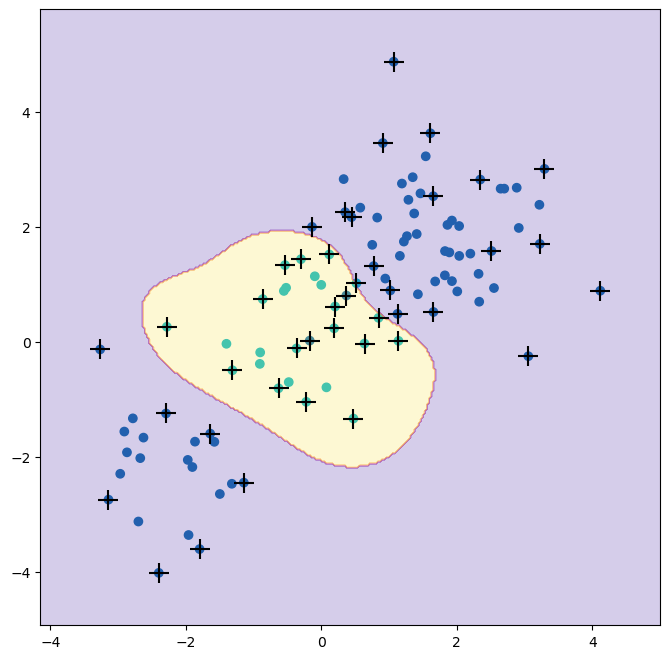

In [57]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)